$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# State vectors and Measurement

## Postulates of Quantum Mechanics for Quantum Computation

<ul>
    <li> Postulate 1: the state of a quantum system or quantum computer is given by the state vector, an array of $2^n$ complex numbers where n is the number of qubits, photons or particles</li>
    <li> Postulate 2: the evolution of the state of a quantum computer - the way the state changes - is determined by the sequence of gates</li>
    <li> Postulate 3: when a measurement is performed, the state changes to a final state which is determined by the measurement outcome, which may be random.  
</ul>

### Complex Numbers

$1\equiv (1+0j)$

$\sqrt{\frac{1}{2}}\approx (0.707+0j)$



## State Vectors

### $\ket{0}=\begin{bmatrix}1\\0\end{bmatrix}$

### $\ket{1}=\begin{bmatrix}0\\1\end{bmatrix}$

### $\Psi=\sqrt{\frac{1}{2}}(\ket{0}+\ket{1})$

### Distributive Property

$\sqrt{\frac{1}{2}}(\ket{0}+\ket{1})=\sqrt{\frac{1}{2}}\ket{0}+\sqrt{\frac{1}{2}}\ket{1}$

(0.707+0j)|0>+(0.707+0j)|1>

### Normalization

### $\braket{\Psi}{\Psi}=\sqrt{\frac{1}{2}} \sqrt{\frac{1}{2}}(\braket{0}{0} +\braket{0}{1}+\braket{1}{0}+\braket{0}{0})=\frac{1}{2}(1+1)=1$

### $(0.707)(0.707)+(0.707)(0.707)\approx 1$

### $\sqrt{\frac{1}{2}}(\ket{00}+\ket{11})$

### (0.707+0j)|00>+(0.707+0j)|11>



In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile, execute
from qiskit.extensions import UnitaryGate
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [3]:
statevector_simulator = qiskit.Aer.get_backend('statevector_simulator')
def ket1(statevector):
    statevector = np.around(statevector,3)
    zero, one = statevector
    text0, text1 = '',''
    if zero != 0:
        text0 = f'{zero}|0>'
    if one != 0:
        text1 = f'{one}|1>'
    if text0 != '' and text1 != '':
        text1 = '+' + text1
    return (text0+text1)
def ket2(statevector):
    statevector = np.around(statevector,3)
    zero, one, two, three = statevector
    text0, text1, text2, text3 = ['']*4
    if zero != 0:
        text0 = f'{zero}|00>'
    if one != 0:
        text1 = f'{one}|10>'
    if two != 0:
        text2 = f'{two}|01>'
    if three != 0:
        text3 = f'{three}|11>'
    if text0 != '' and text1 != '':
        text1 = '+'+text1
    if text0 + text1 != '' and text2 != '':
        text2 = '+' + text2
    if text0 + text1 + text2 != '' and text3 != '':
        text3 = '+' + text3
    return (text0+text1+text2+text3)

### The effects of a minus sign

$\ket{\Psi}$ vs. $-\ket{\Psi}$

In [13]:
def prepare_sign(measure=False):
    circuit = qiskit.QuantumCircuit(1,1)
    circuit.h(0)
    if measure:
        circuit.measure(0,0)
    return circuit
def prepare_minus(measure=False):
    circuit = qiskit.QuantumCircuit(1,1)
    circuit.h(0)
    circuit.rx(np.pi,0)
    if measure:
        circuit.measure(0,0)
    return circuit
statevector = execute(prepare_sign(), backend=statevector_simulator).result().get_statevector()
print(ket1(statevector))
statevector = execute(prepare_minus(), backend=statevector_simulator).result().get_statevector()
print(ket1(statevector))

(0.707+0j)|0>+(0.707+0j)|1>
-0.707j|0>+-0.707j|1>


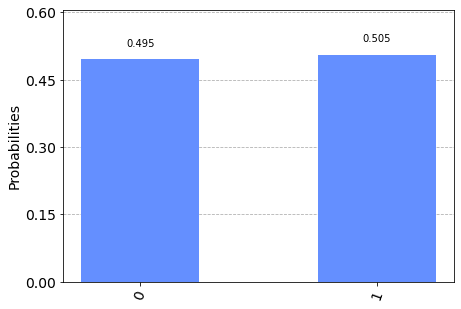

In [16]:
counts = execute(prepare_sign(True), backend=QasmSimulator(), shots=10000).result().get_counts()
plot_histogram(counts)

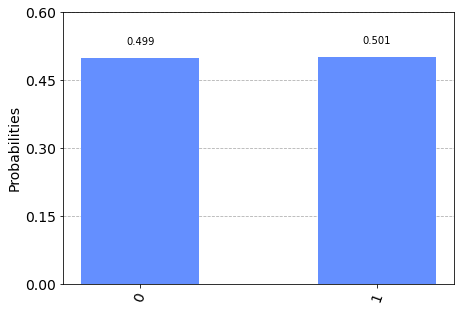

In [17]:
counts = execute(prepare_minus(True), backend=QasmSimulator(), shots=10000).result().get_counts()
plot_histogram(counts)

$\sqrt{\frac{1}{2}}(\ket{0}+\ket{1})$ vs. $\sqrt{\frac{1}{2}}(\ket{0}-\ket{1})$

In [19]:
def prepare_mixed1(measure=False):
    circuit = qiskit.QuantumCircuit(1,1)
    circuit.h(0)
    if measure:
        circuit.measure(0,0)
    return circuit
def prepare_mixed2(measure=False):
    circuit = qiskit.QuantumCircuit(1,1)
    circuit.x(0)
    circuit.h(0)
    if measure:
        circuit.measure(0,0)
    return circuit
statevector = execute(prepare_mixed1(), backend=statevector_simulator).result().get_statevector()
print(ket1(statevector))
statevector = execute(prepare_mixed2(), backend=statevector_simulator).result().get_statevector()
print(ket1(statevector))

(0.707+0j)|0>+(0.707+0j)|1>
(0.707+0j)|0>+(-0.707+0j)|1>


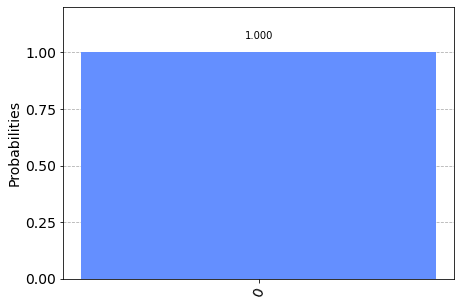

In [22]:
circuit = prepare_mixed1()
circuit.h(0)
circuit.measure(0,0)
counts = execute(circuit, backend=QasmSimulator(), shots=1000).result().get_counts()
plot_histogram(counts)

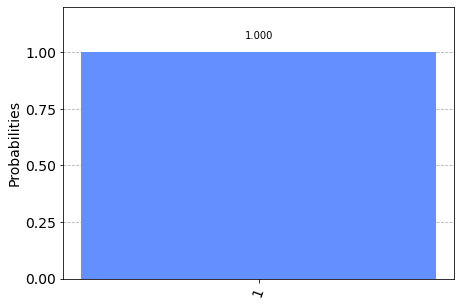

In [23]:
circuit = prepare_mixed2()
circuit.h(0)
circuit.measure(0,0)
counts = execute(circuit, backend=QasmSimulator(), shots=1000).result().get_counts()
plot_histogram(counts)

### The effect of measurement on the state vector

without measuring
	(0.707+0j)|0>+(0.707+0j)|1>
with measuring
	(1+0j)|0>
	(1+0j)|0>
	(1+0j)|1>
	(1+0j)|1>
	(1+0j)|1>
	(1+0j)|1>
	(1+0j)|0>
	(1+0j)|1>


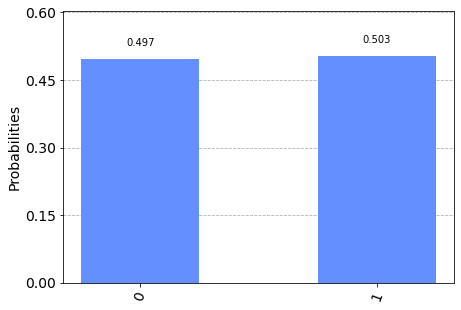

In [3]:
def prepare_circuit(measure=False):
    circuit = qiskit.QuantumCircuit(1,1)
    circuit.h(0)
    if measure:
        circuit.measure(0,0)
    return circuit
statevector = execute(prepare_circuit(), backend=statevector_simulator).result().get_statevector()
print('without measuring')
print('\t'+ket1(statevector))
print('with measuring')
for i in range(8):
    statevector = execute(prepare_circuit(True), backend=statevector_simulator).result().get_statevector()
    print('\t'+ket1(statevector))
    
counts = execute(prepare_circuit(True), backend=QasmSimulator(), shots=1000).result().get_counts()
plot_histogram(counts)

### Effect of Measuring One Qubit Out of Two

without measurement
	(0.707+0j)|00>+(0.707+0j)|11>
measuring qubit zero
	(1+0j)|11>
	(1+0j)|11>
	(1+0j)|00>
	(1+0j)|11>
	(1+0j)|00>
	(1+0j)|11>
	(1+0j)|11>
	(1+0j)|11>


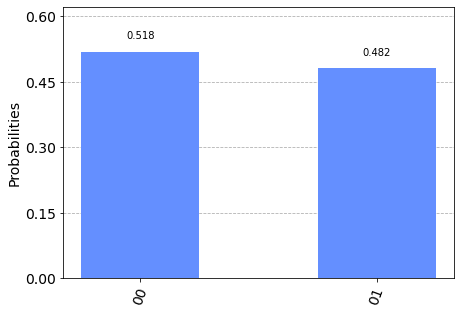

In [4]:
def prepare_circuit2(qubits=[]):
    circuit = qiskit.QuantumCircuit(2,2)
    circuit.h(0)
    circuit.cnot(0,1)
    for m in qubits:
        circuit.measure(m,m)
    return circuit

statevector = execute(prepare_circuit2(), backend=statevector_simulator).result().get_statevector()
#     circuit.cnot(0,1)
print(f'without measurement\n\t{ket2(statevector)}')

print(f'measuring qubit zero')
for i in range(8):
    statevector = execute(prepare_circuit2([0]), backend=statevector_simulator).result().get_statevector()
    print('\t'+ket2(statevector))

counts = execute(prepare_circuit2([0]), backend=QasmSimulator(), shots=1000).result().get_counts()
plot_histogram(counts)

### Effect of Measuring Both Qubits

measuring both qubits
	(1+0j)|00>
	(1+0j)|11>
	(1+0j)|00>
	(1+0j)|11>
	(1+0j)|00>
	(1+0j)|00>
	(1+0j)|11>
	(1+0j)|11>


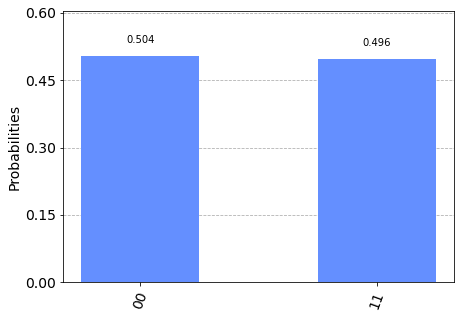

In [5]:
print(f'measuring both qubits')
qubits = [0,1]
for i in range(8):
    statevector = execute(prepare_circuit2(qubits), backend=statevector_simulator).result().get_statevector()
    print('\t'+ket2(statevector))

counts = execute(prepare_circuit2(qubits), backend=QasmSimulator(), shots=1000).result().get_counts()
plot_histogram(counts)

### Effect of Measuring One Qubit Out of Two

without measurement
	(0.5+0j)|00>+(0.5+0j)|10>+(0.5+0j)|01>+(0.5+0j)|11>
measuring qubit zero
	(0.707+0j)|00>+(0.707+0j)|01>
	(0.707+0j)|00>+(0.707+0j)|01>
	(0.707+0j)|00>+(0.707+0j)|01>
	(0.707+0j)|10>+(0.707+0j)|11>
	(0.707+0j)|10>+(0.707+0j)|11>
	(0.707+0j)|10>+(0.707+0j)|11>
	(0.707+0j)|10>+(0.707+0j)|11>
	(0.707+0j)|00>+(0.707+0j)|01>


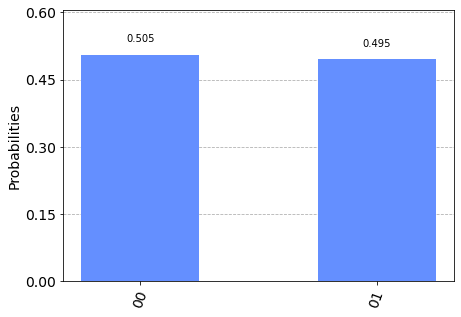

In [9]:
def prepare_circuit3(qubits=[]):
    circuit = qiskit.QuantumCircuit(2,2)
    circuit.h(0)
#     circuit.cnot(0,1)
    circuit.h(1)
    for m in qubits:
        circuit.measure(m,m)
    return circuit


statevector = execute(prepare_circuit3(), backend=statevector_simulator).result().get_statevector()
print(f'without measurement\n\t{ket2(statevector)}')

print(f'measuring qubit zero')
for i in range(8):
    statevector = execute(prepare_circuit3([0]), backend=statevector_simulator).result().get_statevector()
    print('\t'+ket2(statevector))

counts = execute(prepare_circuit3([0]), backend=QasmSimulator(), shots=1000).result().get_counts()
plot_histogram(counts)

### Effect of Measuring Two Qubits

without measurement
	(0.5+0j)|00>+(0.5+0j)|10>+(0.5+0j)|01>+(0.5+0j)|11>
measuring both qubits
	(1+0j)|01>
	(1+0j)|00>
	(1+0j)|11>
	(1+0j)|11>
	(1+0j)|11>
	(1+0j)|10>
	(1+0j)|01>
	(1+0j)|00>


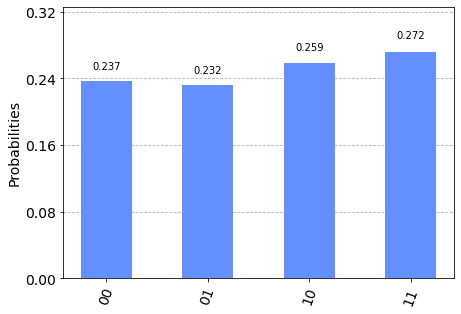

In [7]:
def prepare_circuit4(qubits=[]):
    circuit = qiskit.QuantumCircuit(2,2)
    circuit.h(0)
#     circuit.cnot(0,1)
    circuit.h(1)
    for m in qubits:
        circuit.measure(m,m)
    return circuit


statevector = execute(prepare_circuit4(), backend=statevector_simulator).result().get_statevector()
print(f'without measurement\n\t{ket2(statevector)}')

print(f'measuring both qubits')
qubits = [0,1]
for i in range(8):
    statevector = execute(prepare_circuit4(qubits), backend=statevector_simulator).result().get_statevector()
    print('\t'+ket2(statevector))

counts = execute(prepare_circuit4(qubits), backend=QasmSimulator(), shots=1000).result().get_counts()
plot_histogram(counts)